In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
import numpy as np
#%matplotlib notebook
%matplotlib inline

In [6]:
import os, glob, sys

files = glob.glob('c*.csv')
# make sure we get a consistent order.
files.sort()
data = []
for name in files: 
    try:
        print " reading  file " + name
        thisfile = np.loadtxt(name, skiprows=1, usecols=(0,1,2,3,4),delimiter=",")
        data.append(thisfile)
    except IOError as exc:
        if exc.errno != errno.EISDIR: # Do not fail if a directory is found, just ignore it.
            raise # Propagate other kinds of IOError.
#c = np.loadtxt("c18-06-24-12_00.csv",skiprows=1,usecols=(0,1,2,3,4),delimiter=",")
#c = np.loadtxt("c18-07-01-12_00.csv",skiprows=1,usecols=(0,1,2,3,4),delimiter=",")
#print(c.shape)

 reading  file c18-06-21-02_10.csv
 reading  file c18-06-22-12_00.csv
 reading  file c18-06-23-12_00.csv
 reading  file c18-06-24-12_00.csv
 reading  file c18-06-25-12_00.csv
 reading  file c18-06-26-12_00.csv
 reading  file c18-06-27-12_00.csv
 reading  file c18-06-28-12_00.csv
 reading  file c18-06-29-12_00.csv
 reading  file c18-06-30-12_00.csv
 reading  file c18-07-01-12_00.csv
 reading  file c18-07-02-02_03.csv
 reading  file c18-07-02-02_04.csv
 reading  file c18-07-02-02_18.csv
 reading  file c18-07-02-12_00.csv
 reading  file c18-07-03-12_00.csv
 reading  file c18-07-04-12_00.csv
 reading  file c18-07-05-12_00.csv
 reading  file c18-07-06-12_00.csv
 reading  file c18-07-07-12_00.csv
 reading  file c18-07-08-12_00.csv
 reading  file c18-07-09-12_00.csv
 reading  file c18-07-10-12_00.csv
 reading  file c18-07-11-12_00.csv
 reading  file c18-07-12-12_00.csv
 reading  file c18-07-13-12_00.csv
 reading  file c18-07-14-12_00.csv
 reading  file c18-07-15-12_00.csv
 reading  file c18-0

In [9]:
# massage data and plot

newd = []
for d in data[:]:
    if d.shape[0] > 74200:
        newd.append(d[1:74200,:])

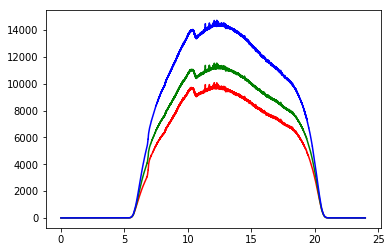

In [10]:
c = newd[0]
time = c[:,0]
time = (time - time[0])/3600


plt.plot(time,c[:,1],'r')
plt.plot(time,c[:,2],'g')
plt.plot(time,c[:,3],'b')
plt.savefig("graph.png")


In [5]:
dawn = np.where((time > 5.5) * (time < 10.))

In [11]:
#print(dawn)
start = int(4*3600)
end = int(22.0*3600)
tbase = (c[start:end,0] - c[0,0])/3600.
#plt.plot(tbase,c[start:end,1],'r')

In [15]:
red = c[start:end,1]
grn = c[start:end,2]
blu = c[start:end,3]

mmax = np.max([np.max(red), np.max(blu), np.max(grn)])

red = red/mmax
grn = grn/mmax
blu = blu/mmax


colors = []
for i, r in enumerate(red):
    colors.append(mpl.colors.to_rgb((red[i],grn[i],blu[i])))

#print(colors)


C:\Users\foote\Anaconda2\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


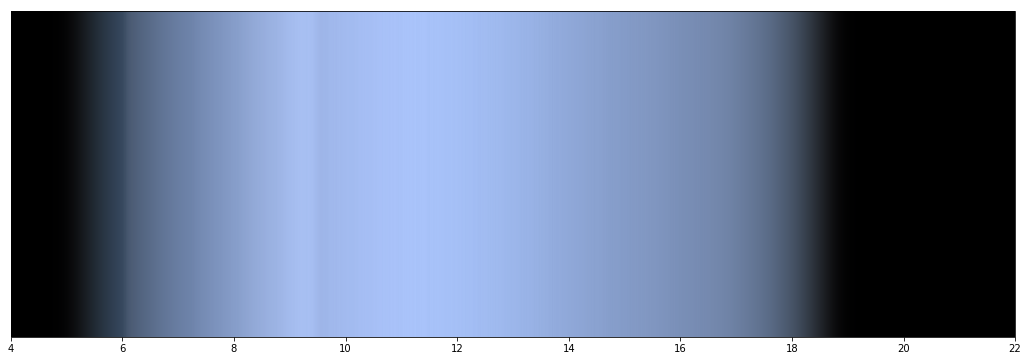

In [13]:
mpl.rcParams['figure.figsize'] = (18, 6)

fig, ax = plt.subplots()

#cmap = mpl.cm.cool
#colors = ["#eaa941", "#efef39", "#53a447", "#3b387f", "#48a2ba"]
cmap= mpl.colors.ListedColormap(colors)

norm = mpl.colors.Normalize(vmin=4, vmax=22.0)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
#cb1.set_label('Some Units')
fig.show()
plt.savefig("colorbar.png")

In [9]:
print(65535/mmax)

2.199234873653478


In [45]:
with open('skycolors.csv', 'w+') as f:
    for i, r in enumerate(red):
        f.write("{:f},{:f},{:f}\n".format(red[i],grn[i],blu[i]))

    

(3L, 59799L)
(3000L, 5980L, 3L)


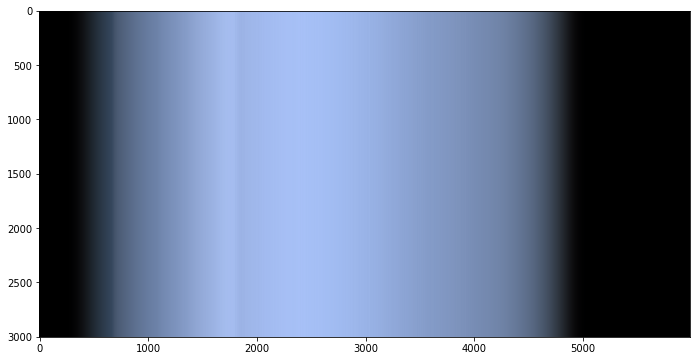

In [16]:


import scipy.signal

def proc_map():
    pass

from PIL import Image, ImageDraw

colors = np.array((red, grn,blu))
print colors.shape
dcol =  scipy.signal.decimate(colors, 10, n=None, ftype='iir', axis=1, zero_phase=True)

dcol_wide = np.multiply.outer(np.ones((3000)),dcol)
dcol_wide = np.swapaxes(dcol_wide,1,2)
print dcol_wide.shape

#img = Image.new('RGB', dcol, color = 'red')

#img.save('pil_red.png')

plt.imshow(dcol_wide)

(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(74199L, 3L)
(4400L, 7420L, 3L)


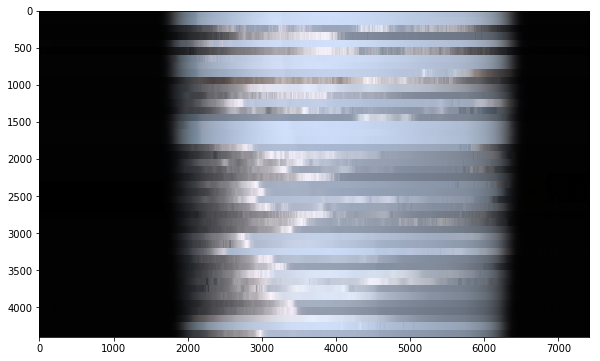

In [136]:
import scipy.signal
from PIL import Image, ImageDraw

days = []
for d in newd[:]:
    colors = d[:,1:4]
    # gamma correct
    colors = (colors / 65535.)**(1/2.2)
    colors = colors/np.max(colors)
    #colors = colors/mmax
    
    print colors.shape
    dcol =  scipy.signal.decimate(colors, 10, n=None, ftype='iir', axis=0, zero_phase=True)
    dcol_wide = np.multiply.outer(np.ones((100)),dcol)
    days.extend(dcol_wide)
    
#dcol_wide = np.multiply.outer(np.ones((500)),dcol)
#dcol_wide = np.swapaxes(dcol_wide,1,2)
days = np.array(days,dtype=float)
print days.shape

daysn = days/np.max(days)
#img = Image.new('RGB', dcol, color = 'red')

#img.save('pil_red.png')

plt.imshow(days)


In [48]:
import imageio
imageio.imwrite('outfile2.png', days)

#img = Image.fromarray(days).convert('RGB')

#img.save('days.png')


(-0.5, 1199.5, 1199.5, -0.5)

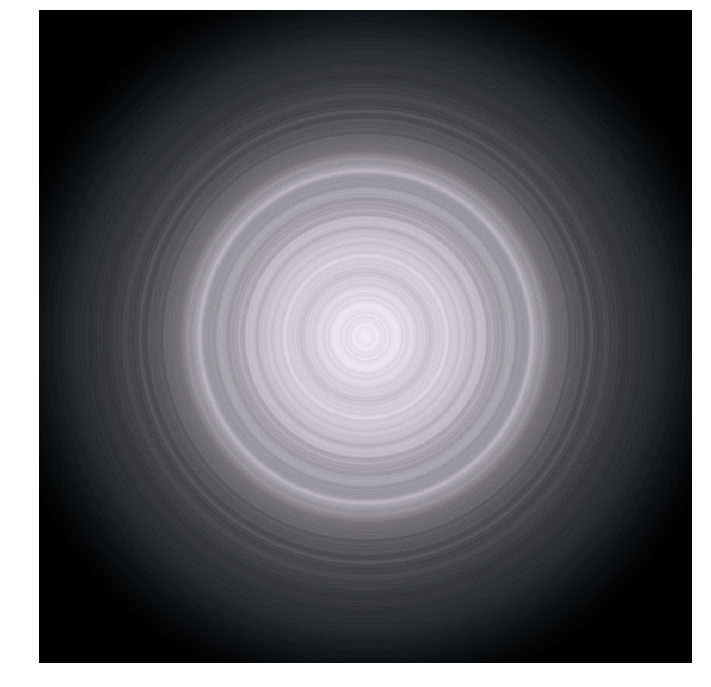

In [137]:
# radial plot

def getcolor(cmap, frac):
    """ go fraction into cmap and return a color triple """
    l, w = cmap.shape
    assert(w ==3)
    i = int(l*frac)
    if i >= l:
        i = l-1
    if i < 0:
        i = 0
    return cmap[i,:]
    

width = 1200
height = 1200
out = np.zeros((width,height,3),dtype=float)

for w in range(width):
    for h in range(height):

        x = (w - width/2)/float(width) 
        y = (h - height/2)/float(height)
        r = np.sqrt(x*x + y*y)
        #print x, y, r
        #out[w,h,:] = [0, 0, 0]
        # want to show morning, so outside (max) is zero and inside (min) is 1/2
        out[h,w] = getcolor(days[300],0.5*(1-r))
        # want to show evening, so outside (max) is 1 and inside (min) is 1/2
        #out[h,w] = getcolor(days[200],1.2*(r + 1)/2)
        #out[h,w] = getcolor(days[200],r)
        
        
    

plt.figure(figsize = (12,12))
plt.imshow(out)
plt.axis('off')    

In [ ]:
def get_colors_for(c):
    red = c[:,1]
    grn = c[:,2]
    blu = c[:,3]

    mmax = np.max([np.max(red), np.max(blu), np.max(grn)])

    red = red/mmax
    grn = grn/mmax
    blu = blu/mmax


    colors = []
    for i, r in enumerate(red):
        colors.append(mpl.colors.to_rgb((red[i],grn[i],blu[i])))
    return colors

c = get_colors_for(newdata[0])
